In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns  
import sklearn
from sklearn import metrics
import joblib
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2

In [2]:
df=pd.read_csv("CrabAgePrediction.csv")
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651645,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976697,6


# Preprocessing

In [3]:
# getting information about dataframe eg.types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [4]:
#checking wether some value is null or not in dataframe
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Weight            False
Shucked Weight    False
Viscera Weight    False
Shell Weight      False
Age               False
dtype: bool

In [5]:
#getting percentile of each column of dataframe
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662132,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491247,29.000000


In [6]:
#checking null value in df
df.isnull()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3888,False,False,False,False,False,False,False,False,False
3889,False,False,False,False,False,False,False,False,False
3890,False,False,False,False,False,False,False,False,False
3891,False,False,False,False,False,False,False,False,False


In [7]:
#dropping Nan values
df = df.dropna()   
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651645,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976697,6


# Feature Selection

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.986653,0.823081,0.925374,0.898181,0.903253,0.897736,0.554973
Diameter,0.986653,1.000000,0.829532,0.925770,0.893626,0.899810,0.905561,0.573844
Height,0.823081,0.829532,1.000000,0.814405,0.770961,0.793272,0.812290,0.551956
Weight,0.925374,0.925770,0.814405,1.000000,0.969077,0.965583,0.955269,0.538819
Shucked Weight,0.898181,0.893626,0.770961,0.969077,1.000000,0.931280,0.882406,0.418760
Viscera Weight,0.903253,0.899810,0.793272,0.965583,0.931280,1.000000,0.906105,0.501328
Shell Weight,0.897736,0.905561,0.812290,0.955269,0.882406,0.906105,1.000000,0.625195
Age,0.554973,0.573844,0.551956,0.538819,0.418760,0.501328,0.625195,1.000000


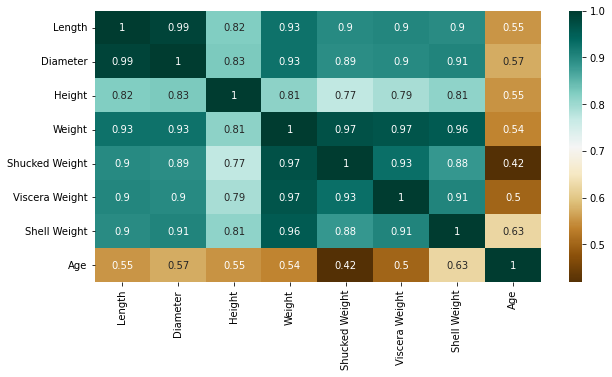

In [8]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [9]:
X = df.iloc[:,1:8]  #independent columns
y = df.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs         Score
3          Weight  13433.702102
4  Shucked Weight   5116.258905
6    Shell Weight   4326.919071
5  Viscera Weight   2909.637115
0          Length    146.933754
1        Diameter    131.316912
2          Height     54.163006


# Managing dummy variables

In [10]:
#managing categorical features by one hot encoding eg. dummy variables
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [11]:
df

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0
...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651645,5.854172,6.378637,8,0,0
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,0,0
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1,0
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976697,6,1,0


# outliers removal

**length**

<AxesSubplot:xlabel='Length'>

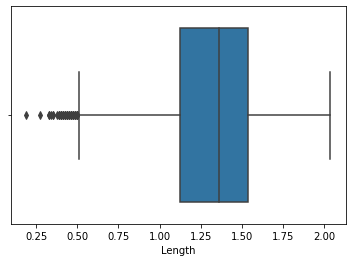

In [12]:
sns.boxplot(x=df['Length']) 

In [13]:
Q1 = df['Length'].quantile(0.25)
Q3 = df['Length'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df['Length']>lower_limit)&(df['Length']<upper_limit)]

**Diameter**

<AxesSubplot:xlabel='Diameter'>

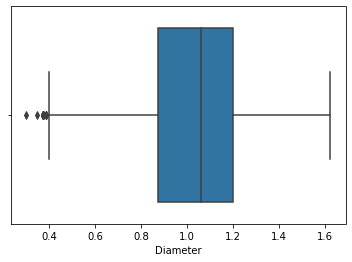

In [14]:
sns.boxplot(x=df['Diameter']) 

**Height**

In [15]:
Q1 = df['Diameter'].quantile(0.25)
Q3 = df['Diameter'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df['Diameter']>lower_limit)&(df['Diameter']<upper_limit)]

<AxesSubplot:xlabel='Height'>

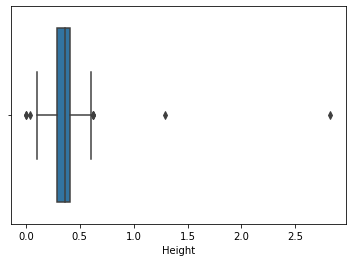

In [16]:
sns.boxplot(x=df['Height']) 

In [17]:
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df['Height']>lower_limit)&(df['Height']<upper_limit)]

**weight**

<AxesSubplot:xlabel='Weight'>

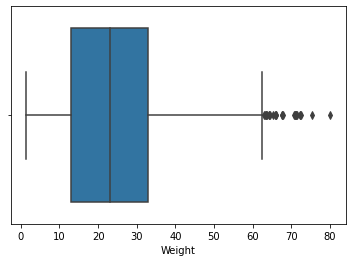

In [18]:
sns.boxplot(x=df['Weight'])

In [19]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df['Weight']>lower_limit)&(df['Weight']<upper_limit)]

**Shucked Weight**

<AxesSubplot:xlabel='Shucked Weight'>

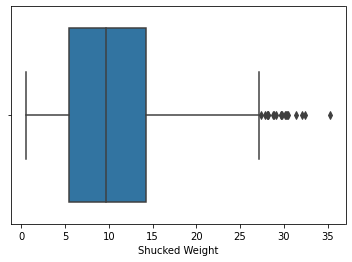

In [20]:
sns.boxplot(x=df['Shucked Weight'])

In [21]:
Q1 = df['Shucked Weight'].quantile(0.25)
Q3 = df['Shucked Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df['Shucked Weight']>lower_limit)&(df['Shucked Weight']<upper_limit)]

**Viscera Weight**

<AxesSubplot:xlabel='Viscera Weight'>

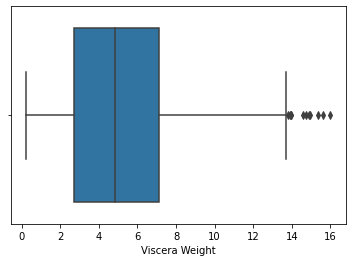

In [22]:
sns.boxplot(x=df['Viscera Weight'])

In [23]:
Q1 = df['Viscera Weight'].quantile(0.25)
Q3 = df['Viscera Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df['Viscera Weight']>lower_limit)&(df['Viscera Weight']<upper_limit)]

**Shell Weight**

<AxesSubplot:xlabel='Shell Weight'>

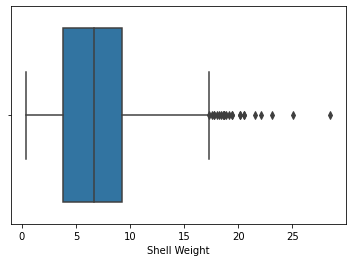

In [24]:
sns.boxplot(x=df['Shell Weight'])

In [25]:
Q1 = df['Shell Weight'].quantile(0.25)
Q3 = df['Shell Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df['Shell Weight']>lower_limit)&(df['Shell Weight']<upper_limit)]

**Age**

<AxesSubplot:xlabel='Age'>

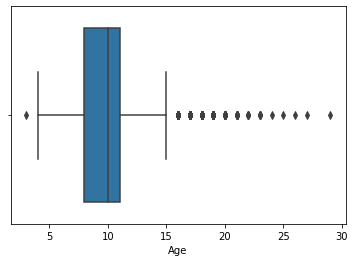

In [26]:
sns.boxplot(x=df['Age'])

In [27]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df['Age']>lower_limit)&(df['Age']<upper_limit)]

In [28]:
df

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0
...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651645,5.854172,6.378637,8,0,0
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,0,0
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1,0
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976697,6,1,0


In [29]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
df

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0
...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651645,5.854172,6.378637,8,0,0
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,0,0
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1,0
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976697,6,1,0


# Splitting test and train

In [31]:
X = df[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Sex_I','Sex_M']]

y = df["Age"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 101)


# XGBoost Regression

In [33]:
#apply xgboost regressor along with gridsearchcv
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(tree_method='gpu_hist'),
            param_grid= {
                    'learning_rate': [0.01, 0.1],
                    'max_depth': [3, 5, 7, 10],
                    'min_child_weight': [1, 3, 5],
                    'subsample': [0.5, 0.7],
                    'colsample_bytree': [0.5, 0.7],
                    'n_estimators' : [100, 200, 500],
                    'objective': ['reg:squarederror']},
                    cv=5, verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_estimator_
print(best_params)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)


In [34]:
# take predictions from model
predictions = grid_result.predict(X_test)

# Measurement metrices

In [35]:
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 1.2546255568153837
MSE 2.714326660371726
RMSE 1.6475213687147507


# Saving Model

In [36]:
#saving model for later use
joblib.dump(grid_result, 'model/model.pkl')
#joblib.load('model/model.pkl')

['model/model.pkl']

# Loading model 

In [37]:
model=joblib.load('model/model.pkl')

In [43]:
print(model.predict([[0.8875, 0.6500, 0.2125, 5.400580, 2.296310 ,1.374951 ,1.559222, 0, 1]]))

[7.4244666]
